In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('twitter_training.csv', encoding='latin1', on_bad_lines='skip')


In [11]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
col_names = ['ID', 'Entity', 'Sentiments', 'Contest']
df = pd.read_csv(
    'twitter_training.csv',
    names=col_names,
    encoding='latin1',          # Fix encoding issue
    on_bad_lines='skip'         # Skip malformed rows (for pandas >= 1.3.0)
)


In [14]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
df.shape

(74646, 4)

In [16]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74641  9200       Nvidia   Positive   
74642  9200       Nvidia   Positive   
74643  9200       Nvidia   Positive   
74644  9200       Nvidia   Positive   
74645  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74641  Just realized that the Windows partition of my...  
74642  Just realized that

In [17]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [18]:
df.dropna(axis=0,inplace=True)

In [19]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [20]:
df.duplicated().sum()

2339

In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [22]:
df.shape

(71621, 4)

In [23]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

Negative      21690
Positive      19704
Neutral       17702
Irrelevant    12525
Name: Sentiments, dtype: int64

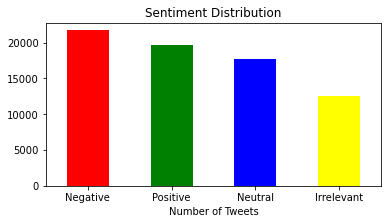

In [24]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()


In [25]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: Sentiments, dtype: int64

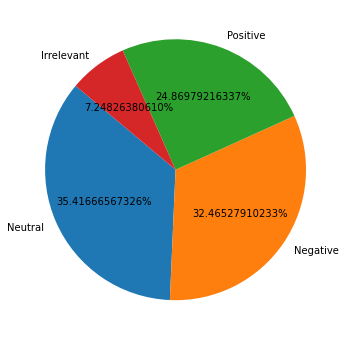

In [26]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts,labels=brand_sentiment_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()